# Data Preparation Phase

In [1]:
#importing libraries
# from sklearn.datasets import load_boston
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
# import statsmodels.api as sm
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
# from sklearn.feature_selection import RFE
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso

In [2]:
#Read dataset
redwine_data = pd.read_csv('data/winequality-red.csv',sep=';')
redwine_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
#Renaming columns
redwine_data.rename(columns={'fixed acidity':'fixed_acidity','volatile acidity':'volatile_acidity',\
                            'citric acid':'citric_acid','residual sugar':'residual_sugar','free sulfur dioxide':\
                             'free_sulfur_dioxide','total sulfur dioxide':'total_sulfur_dioxide'}, inplace=True)

In [4]:
redwine_data.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
#Checking nulls
redwine_data.isnull().sum()

fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [6]:
#Summary
redwine_data.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


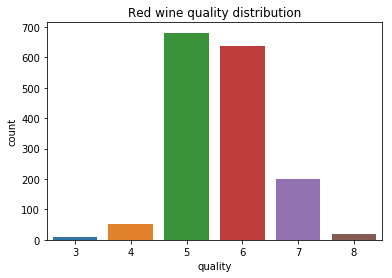

In [7]:
#Look at distribution for wine quality
ax = sns.countplot(x=redwine_data["quality"], data=redwine_data)
plt.title("Red wine quality distribution")
plt.savefig("static/images/RedWines/quality_distribution.png")

* Above graph tells us that we have a skewed dataset where most wines are of average quality.

# Feature selection

## 1. Pearson correlation - Filter Method

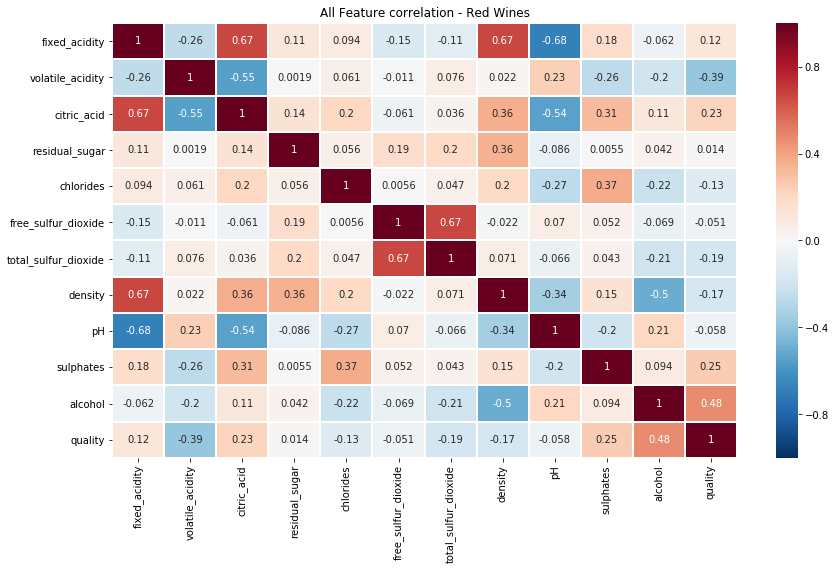

In [8]:
#Visualize correlation of all features using seaborn heatmap
corr = redwine_data.corr()
plt.figure(figsize=(14,8))
sns.heatmap(corr, annot=True, linewidths=1, vmin=-1, cmap='RdBu_r')
plt.title("All Feature correlation - Red Wines")
plt.savefig("static/images/RedWines/red_wine_all_feature_corr.png")
plt.show()

In [9]:
# Find correlation of important features with wine quality
corr_target = abs(corr["quality"])

#Here we will consider all features that have over 10% impact on quality
relevant_features = corr_target[corr_target>0.1]
relevant_features.sort_values(ascending=False)

quality                 1.000000
alcohol                 0.476166
volatile_acidity        0.390558
sulphates               0.251397
citric_acid             0.226373
total_sulfur_dioxide    0.185100
density                 0.174919
chlorides               0.128907
fixed_acidity           0.124052
Name: quality, dtype: float64

### Find correlation among selected features

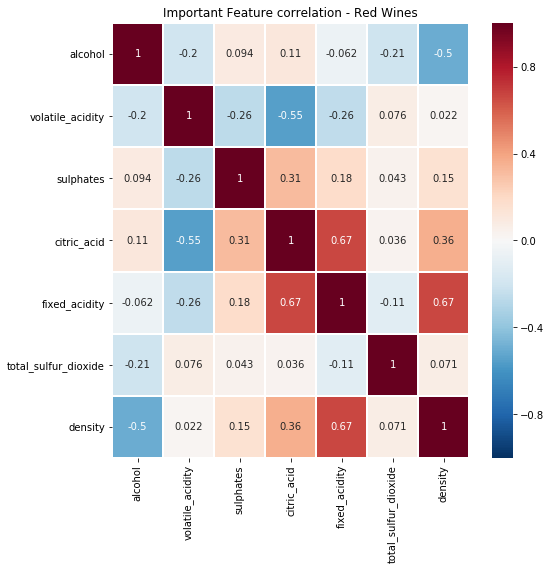

In [10]:
feat_corr = redwine_data[["alcohol","volatile_acidity","sulphates","citric_acid","fixed_acidity","total_sulfur_dioxide",\
                    "density"]].corr()
plt.figure(figsize=(8,8))
sns.heatmap(feat_corr, annot=True, linewidths=1, vmin=-1, cmap='RdBu_r')
plt.title("Important Feature correlation - Red Wines")
plt.savefig("static/images/RedWines/red_wine_imp_feature_corr.png")
plt.show()

### From above heatmap, we can tell that -
* citric acid and fixed acidity are positively correlated. 
* density and fixed acidity are also positively correlated.
* So we will eliminate fixed acidity since it has the least impact on quality. 

In [11]:
#Alternatively we can find correlation this way
print(redwine_data[["alcohol","volatile_acidity","sulphates","citric_acid","fixed_acidity","total_sulfur_dioxide",\
                    "density"]].corr())

                       alcohol  volatile_acidity  sulphates  citric_acid  \
alcohol               1.000000         -0.202288   0.093595     0.109903   
volatile_acidity     -0.202288          1.000000  -0.260987    -0.552496   
sulphates             0.093595         -0.260987   1.000000     0.312770   
citric_acid           0.109903         -0.552496   0.312770     1.000000   
fixed_acidity        -0.061668         -0.256131   0.183006     0.671703   
total_sulfur_dioxide -0.205654          0.076470   0.042947     0.035533   
density              -0.496180          0.022026   0.148506     0.364947   

                      fixed_acidity  total_sulfur_dioxide   density  
alcohol                   -0.061668             -0.205654 -0.496180  
volatile_acidity          -0.256131              0.076470  0.022026  
sulphates                  0.183006              0.042947  0.148506  
citric_acid                0.671703              0.035533  0.364947  
fixed_acidity              1.000000      

### Our final list of important features

In [12]:
imp_features = redwine_data.loc[:,["alcohol","volatile_acidity","sulphates","citric_acid","total_sulfur_dioxide","density"]]
imp_features.head()

,alcohol,volatile_acidity,sulphates,citric_acid,total_sulfur_dioxide,density
0,9.4,0.70,0.56,0.00,34.0,0.9978
1,9.8,0.88,0.68,0.00,67.0,0.9968
2,9.8,0.76,0.65,0.04,54.0,0.9970
3,9.8,0.28,0.58,0.56,60.0,0.9980
4,9.4,0.70,0.56,0.00,34.0,0.9978


## 2. Feature selection using Lasso Regularization
Regularization methods are the most commonly used embedded methods which penalize a feature given a coefficient threshold.
Here we will do feature selection using Lasso regularization. If the feature is irrelevant, lasso penalizes it’s coefficient and make it 0. Hence the features with coefficient = 0 are removed and the rest are taken.

In [13]:
X = redwine_data.drop('quality',1)   #Feature Matrix
y = redwine_data['quality'].values.reshape(-1, 1)         #Target Variable
print(X.shape,y.shape)

(1599, 11) (1599, 1)


In [14]:
#Lasso
reg = LassoCV()
reg.fit(X, y)

print("Best alpha using built-in LassoCV: %f" % reg.alpha_)
print("Best score using built-in LassoCV: %f" %reg.score(X,y))
coef = pd.Series(reg.coef_, index = X.columns)

Best alpha using built-in LassoCV: 0.005650
Best score using built-in LassoCV: 0.344854


C:\Users\18137\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\18137\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


In [15]:
coef

fixed_acidity           0.030220
volatile_acidity       -0.974597
citric_acid            -0.000000
residual_sugar          0.000000
chlorides              -0.000000
free_sulfur_dioxide     0.004803
total_sulfur_dioxide   -0.003072
density                -0.000000
pH                     -0.000000
sulphates               0.508058
alcohol                 0.301986
dtype: float64

In [16]:
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

Lasso picked 6 variables and eliminated the other 5 variables


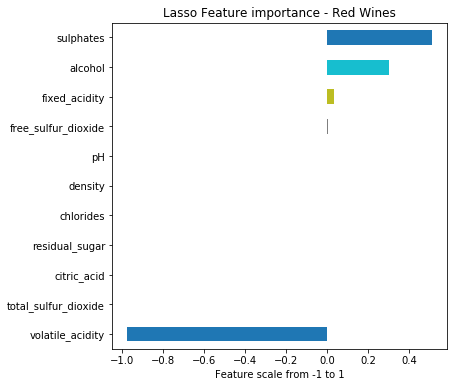

In [17]:
#Plot important features
imp_coef = coef.sort_values()
import matplotlib
matplotlib.rcParams['figure.figsize'] = (6.0, 6.0)
imp_coef.plot(kind = "barh")
plt.title("Lasso Feature importance - Red Wines")
plt.xlabel("Feature scale from -1 to 1")
plt.savefig("static/images/RedWines/red_wine_Lasso_feature_sel.png")
plt.show()

### Features that Lasso selected are :
* Volatile acidity
* sulphates
* alcohol
* fixed acidity
* free sulfur dioxide
* total sulfur dioxide

# Applying Linear Regression to our data

In [18]:
X = redwine_data.drop('quality',1)   #Feature Matrix
y = redwine_data['quality'].values.reshape(-1, 1)         #Target Variable
print(X.shape,y.shape)

(1599, 11) (1599, 1)


In [19]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X, y)

from sklearn.preprocessing import StandardScaler
# Create a StandardScater model and fit it to the training data
X_scaler = StandardScaler().fit(X)
y_scaler = StandardScaler().fit(y)
X_scaled = X_scaler.transform(X)
y_scaled = y_scaler.transform(y)

C:\Users\18137\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\18137\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


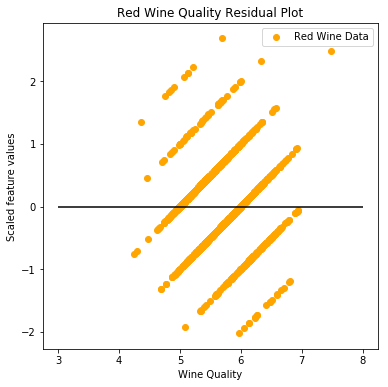

In [20]:
# Residual plot 
plt.scatter(model.predict(X), model.predict(X) - y, c="orange", label="Red Wine Data")
plt.legend()
plt.hlines(y=0, xmin=y.min(), xmax=y.max())
plt.title("Red Wine Quality Residual Plot")
plt.xlabel("Wine Quality")
plt.ylabel("Scaled feature values")
plt.savefig("static/images/RedWines/red_wine_residual_plot.png")
plt.show()

If the points in a residual plot are randomly dispersed around the horizontal axis, a linear regression model is appropriate for the data; otherwise, a non-linear model is more appropriate.
### Coclusion
Since there is a pattern in the data, linear regression is not a good fit for our dataset. So we will choose a non-linear model. 

# Detecting outliers in our dataset

### 1. Let's convert our output into a categorical value set  

In [21]:
# #Defining the splits for wine quality. 1–4 will be poor quality, 5–6 will be average, 7–10 will be great
bins = [1,4,6,10]
#0 for low quality, 1 for average, 2 for great quality
quality_labels=[0,1,2]
redwine_data['quality_class'] = pd.cut(redwine_data['quality'], bins=bins, labels=quality_labels, include_lowest=True)
#Displays the first 2 columns
# display(redwine_data.head(n=10))
redwine_data.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,quality_class
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1


### 2. Let's visualize the selected features against our categorical output

C:\Users\18137\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\18137\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\18137\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\Users\18137\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


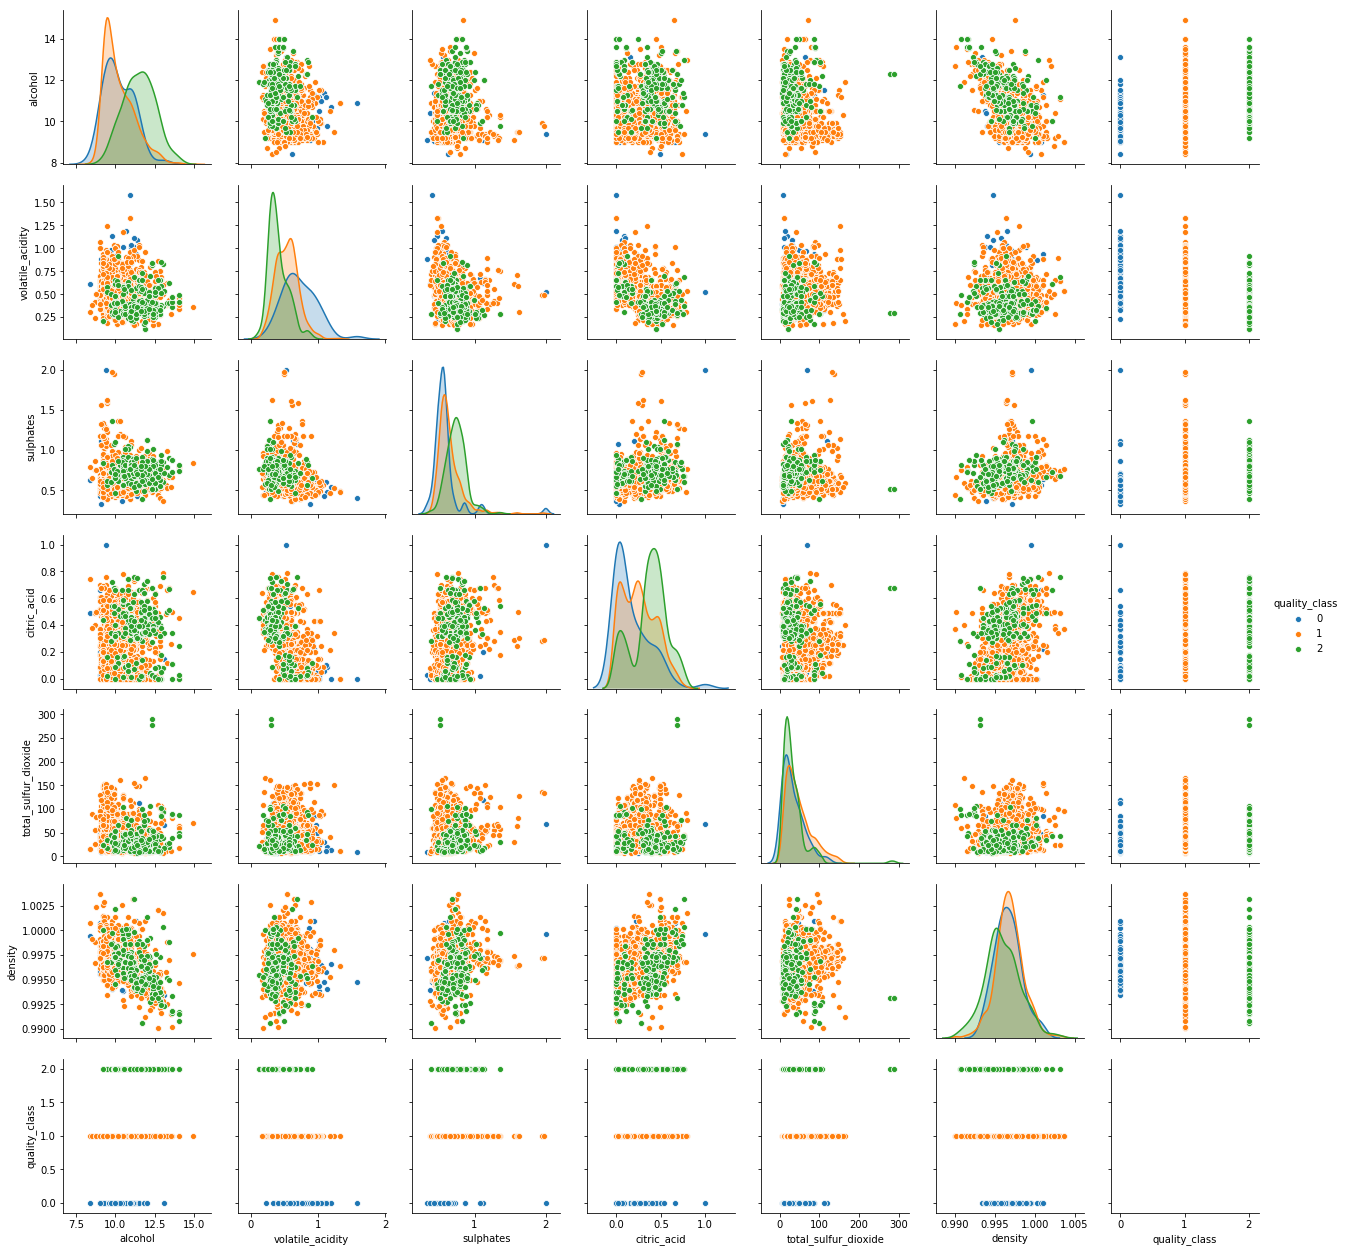

In [22]:
# imp_features = redwine_data.loc[:,["alcohol","volatile_acidity","sulphates","citric_acid","total_sulfur_dioxide","density"]]
# imp_features.head()
# # Plot
data = redwine_data.loc[:,["alcohol","volatile_acidity","sulphates","citric_acid","total_sulfur_dioxide","density","quality_class"]]
sns.pairplot(data, hue='quality_class')
;
plt.savefig("static/images/RedWines/red_wine_feature_heatmap.png")

### 3. Let's identify outliers

#### Total sulfur dioxide

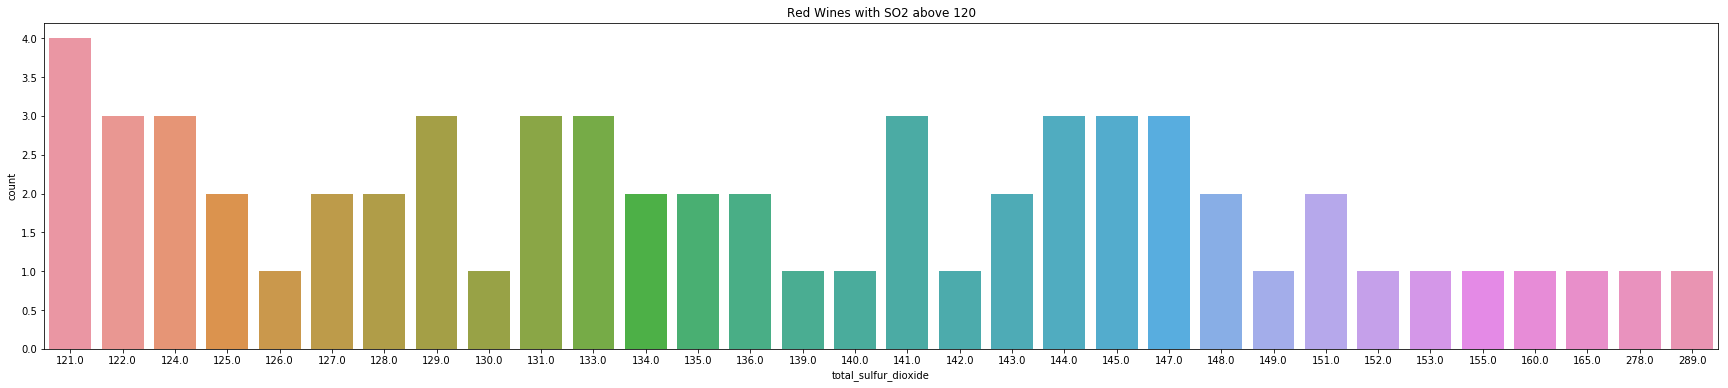

In [23]:
plt.figure(figsize=(30,6))
ax = sns.countplot(x="total_sulfur_dioxide", data=redwine_data[redwine_data.total_sulfur_dioxide > 120])
plt.title("Red Wines with SO2 above 120")
plt.savefig("static/images/RedWines/red_wine_so2_above120.png")

In the EU the maximum levels of sulfur dioxide that a wine can contain are 210 ppm for white wine, 400 ppm for sweet wines — and 160 ppm for red wine. Quite similar levels apply in the U.S., Australia and around the world.
https://www.thekitchn.com/the-truth-about-sulfites-in-wine-myths-of-red-wine-headaches-100878
The amount of sulphur dioxide winemakers are allowed to add is strictly controlled to a limit of 250 milligrams per litre.
https://www.wineselectors.com.au/selector-magazine/wine/preserving-the-truth-on-sulphates-in-wine

In [24]:
#Let's find wines with high SO2 
redwine_data[redwine_data.total_sulfur_dioxide > 160]

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,quality_class
354,6.1,0.21,0.40,1.4,0.066,40.5,165.0,0.99120,3.25,0.59,11.9,6,1
1079,7.9,0.30,0.68,8.3,0.050,37.5,278.0,0.99316,3.01,0.51,12.3,7,2
1081,7.9,0.30,0.68,8.3,0.050,37.5,289.0,0.99316,3.01,0.51,12.3,7,2


#### Citric acid

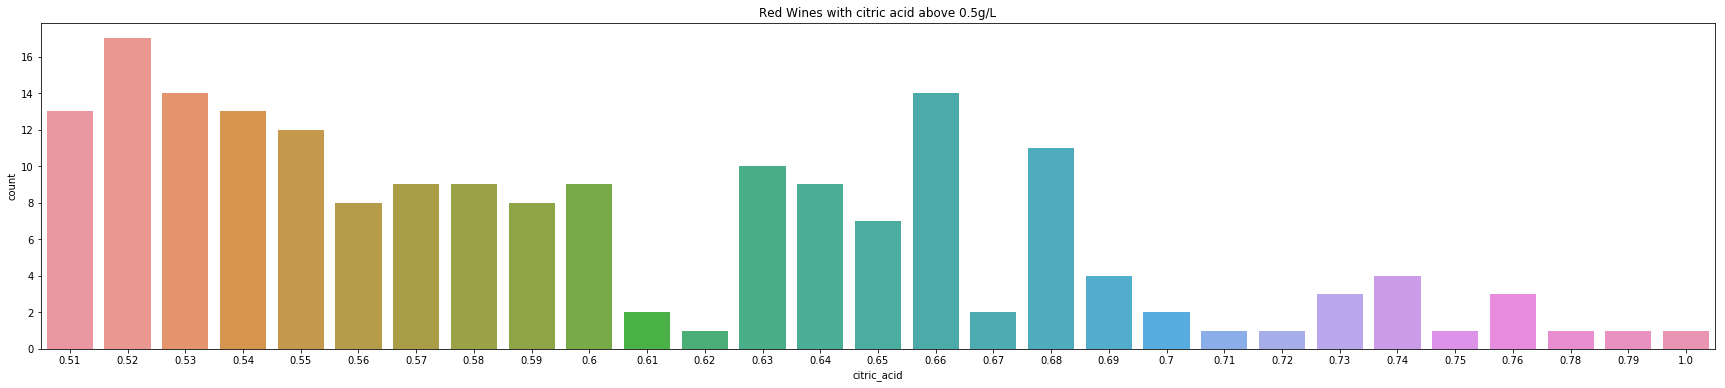

In [25]:
plt.figure(figsize=(30,6))
# ax = sns.countplot(x=redwine_data["citric_acid"], data=redwine_data)
ax = sns.countplot(x="citric_acid", data=redwine_data[redwine_data.citric_acid > 0.5])
plt.title("Red Wines with citric acid above 0.5g/L")
plt.savefig("static/images/RedWines/red_wine_citric_acid_above_500.png")

The predominant fixed acids found in wines are tartaric, malic, citric, and succinic.  Their respective levels found in wine can vary greatly but in general one would expect to see 1,000 to 4,000 mg/L tartaric acid, 0 to 8,000 mg/L malic acid, 0 to 500 mg/L citric acid, and 500 to 2,000 mg/L succinic acid.
https://waterhouse.ucdavis.edu/whats-in-wine/fixed-acidity

In [26]:
#Let's find wines with very high citric acid  
redwine_data[redwine_data.citric_acid > 0.8]

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,quality_class
151,9.2,0.52,1.0,3.4,0.61,32.0,69.0,0.9996,2.74,2.0,9.4,4,0


#### Volatile acidity
Volatile acidity is mostly caused by bacteria in the wine creating acetic acid — the acid that gives vinegar its characteristic flavor and aroma.
https://winemakermag.com/article/676-the-perils-of-volatile-acidity

### 4. Eliminate Outliers

In [27]:
redwine_df_trimmed = redwine_data.drop(redwine_data[(redwine_data.citric_acid > 0.9 ) | \
                                                    (redwine_data.total_sulfur_dioxide > 165)].index)
redwine_df_trimmed.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,1596.000000,1596.000000,1596.000000,1596.000000,1596.000000,1596.000000,1596.000000,1596.000000,1596.000000,1596.000000,1596.000000,1596.000000
mean,8.319612,0.528111,0.270006,2.531046,0.087186,15.837719,46.156642,0.996749,3.311848,0.657494,10.421272,5.635338
std,1.742530,0.179046,0.193584,1.396242,0.045236,10.434073,31.831338,0.001883,0.153497,0.166222,1.064287,0.805843
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.860000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997832,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,0.790000,15.500000,0.611000,72.000000,165.000000,1.003690,4.010000,1.980000,14.900000,8.000000


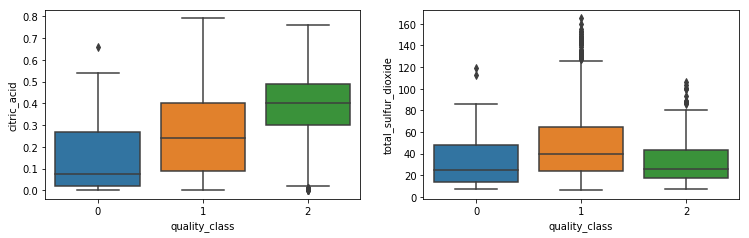

In [28]:
#Visualize features after removing outliers using boxplot
plt.figure(figsize=(26,16))
no_outliers = redwine_df_trimmed.loc[:,["citric_acid","total_sulfur_dioxide","quality_class"]]
# outliers = redwine_df_trimmed.loc[:,redwine_df_trimmed['citric_acid','total_sulfur_dioxide','quality_categorical']]
for column_index, column in enumerate(no_outliers.columns):
    if column == 'quality_class':
        continue
    plt.subplot(4, 4, column_index + 1)
    sns.boxplot(x='quality_class', y=column, data=no_outliers)
plt.savefig(f"static/images/RedWines/red_wine_boxplot.png")

### 5. Here's our clean dataset

In [29]:
redwine_df_clean = redwine_df_trimmed.loc[:,["alcohol","volatile_acidity","sulphates","citric_acid","total_sulfur_dioxide",\
                                             "density","quality","quality_class"]]
redwine_df_clean.describe()

,alcohol,volatile_acidity,sulphates,citric_acid,total_sulfur_dioxide,density,quality
count,1596.000000,1596.000000,1596.000000,1596.000000,1596.000000,1596.000000,1596.000000
mean,10.421272,0.528111,0.657494,0.270006,46.156642,0.996749,5.635338
std,1.064287,0.179046,0.166222,0.193584,31.831338,0.001883,0.805843
min,8.400000,0.120000,0.330000,0.000000,6.000000,0.990070,3.000000
25%,9.500000,0.390000,0.550000,0.090000,22.000000,0.995600,5.000000
50%,10.200000,0.520000,0.620000,0.260000,38.000000,0.996750,6.000000
75%,11.100000,0.640000,0.730000,0.420000,62.000000,0.997832,6.000000
max,14.900000,1.580000,1.980000,0.790000,165.000000,1.003690,8.000000


In [30]:
#Export dataframe to csv
redwine_df_clean.to_csv('data/redwine_clean_data.csv', index = None, header=True)

# Testing and Model Selection

### 1. Prepare target and feature sets

In [31]:
redwine_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1596 entries, 0 to 1598
Data columns (total 8 columns):
alcohol                 1596 non-null float64
volatile_acidity        1596 non-null float64
sulphates               1596 non-null float64
citric_acid             1596 non-null float64
total_sulfur_dioxide    1596 non-null float64
density                 1596 non-null float64
quality                 1596 non-null int64
quality_class           1596 non-null category
dtypes: category(1), float64(6), int64(1)
memory usage: 181.4 KB


In [32]:
# Convert quality_class from category to integer type
redwine_df_clean["quality_class"]=redwine_df_clean["quality_class"].astype('int64')
redwine_df_clean['quality_class'].dtype

dtype('int64')

In [33]:
#X represents features and y represents target
X = redwine_df_clean.drop(["quality","quality_class"], axis=1)
y = redwine_df_clean["quality_class"]
print(X.shape, y.shape)

(1596, 6) (1596,)


### 2. Split dataset into training and testing 

In [34]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,random_state=1, stratify=y)

In [35]:
print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))

Training set has 1197 samples.
Testing set has 399 samples.


### 3. Define a function to fit, train and evaluate each model

In [36]:
from time import time
from sklearn.metrics import fbeta_score
from sklearn.metrics import accuracy_score

def model_scores(classifier, X_train, y_train, X_test, y_test):
    results = {}
    classifier=classifier.fit(X_train, y_train)
    predictions_train = classifier.predict(X_train)
    predictions_test = classifier.predict(X_test)
    results['acc_train'] = accuracy_score(y_train, predictions_train)
    results['acc_test'] = accuracy_score(y_test, predictions_test)
    results['f_train'] = fbeta_score(y_train, predictions_train, beta=0.5, average='micro')
    results['f_test'] = fbeta_score(y_test, predictions_test, beta=0.5, average='micro')
    return results

### 4. Define Classification models to train and test
* LogisticRegression
* Decision Tree
* Random Forest Classifier
* KNeighbors Classifier
* Support vector machine linear classifier

In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
clf_A = LogisticRegression()
clf_B = DecisionTreeClassifier(max_depth=None, random_state=1)
clf_C = RandomForestClassifier(n_estimators=100, max_depth=None, random_state=1)
clf_D = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
clf_E = SVC(kernel = 'linear', random_state = 0)
clf_F = GaussianNB()

results = {}

for clf in [clf_A, clf_B, clf_C,clf_D,clf_E,clf_F]:
    clf_name = clf.__class__.__name__
    results[clf_name] = {}
    results[clf_name] = model_scores(clf, X_train, y_train, X_test, y_test)

C:\Users\18137\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\18137\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


### 5. Compare F1 scores and accuracy of all models

In [38]:
results

{'LogisticRegression': {'acc_train': 0.835421888053467,
  'acc_test': 0.8320802005012531,
  'f_train': 0.835421888053467,
  'f_test': 0.8320802005012531},
 'DecisionTreeClassifier': {'acc_train': 1.0,
  'acc_test': 0.8145363408521303,
  'f_train': 1.0,
  'f_test': 0.8145363408521303},
 'RandomForestClassifier': {'acc_train': 1.0,
  'acc_test': 0.8696741854636592,
  'f_train': 1.0,
  'f_test': 0.8696741854636592},
 'KNeighborsClassifier': {'acc_train': 0.8671679197994987,
  'acc_test': 0.8045112781954887,
  'f_train': 0.8671679197994987,
  'f_test': 0.8045112781954887},
 'SVC': {'acc_train': 0.8262322472848789,
  'acc_test': 0.8270676691729323,
  'f_train': 0.8262322472848789,
  'f_test': 0.8270676691729323},
 'GaussianNB': {'acc_train': 0.8203842940685045,
  'acc_test': 0.8170426065162907,
  'f_train': 0.8203842940685045,
  'f_test': 0.8170426065162907}}

In [39]:
#Convert results dictionary into a pandas dataframe 
model_df = pd.DataFrame(results)
model_df

,LogisticRegression,DecisionTreeClassifier,RandomForestClassifier,KNeighborsClassifier,SVC,GaussianNB
acc_test,0.832080,0.814536,0.869674,0.804511,0.827068,0.817043
acc_train,0.835422,1.000000,1.000000,0.867168,0.826232,0.820384
f_test,0.832080,0.814536,0.869674,0.804511,0.827068,0.817043
f_train,0.835422,1.000000,1.000000,0.867168,0.826232,0.820384


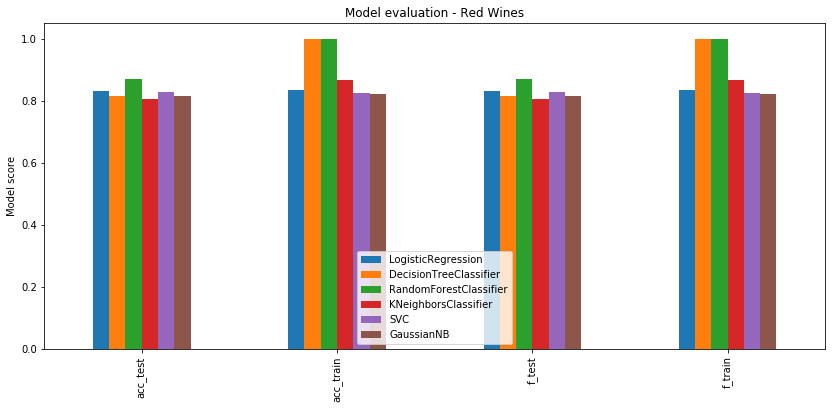

In [40]:
#Visualize model results
model_df.plot(kind="bar", stacked=False, figsize=(14,6), title = "Accuracy and F1 Score comparison between models")
plt.title("Model evaluation - Red Wines")
plt.ylabel("Model score")
plt.savefig("static/images/RedWines/red_wine_model_eval.png")
plt.show()

#### In our example, our output is highly skewed towards average quality wines. So, accuracy is not a good indicator of performance. 
Therefore, we are plotting F1 score which is the harmonic average of precision and recall. 

Random Foreset Classifier has the best accuracy and F1 score among all the models we tested. 

### 6. HyperParameter tuning

Decision Trees and Random Forests are prone to overfitting. So it is important to optimize our model by tuning the model parameters.

In [41]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold, StratifiedKFold

rf_clf = RandomForestClassifier()

parameter_grid = {'n_estimators': [10, 25, 50, 100],
                  'criterion': ['gini', 'entropy'],
                  'max_features': [1, 2, 3, 4]}
#StatifiedKFold takes group information into account to avoid building folds with imbalanced class 
#distributions (for binary or multiclass classification tasks).
cross_validation = StratifiedKFold(n_splits=10)

grid_search = GridSearchCV(rf_clf,
                           param_grid=parameter_grid,
                           cv=cross_validation)

grid_search.fit(X_train, y_train)
print('Best score: {}'.format(grid_search.best_score_))
print('Best parameters: {}'.format(grid_search.best_params_))

grid_search.best_estimator_

Best score: 0.8738512949039264
Best parameters: {'criterion': 'entropy', 'max_features': 1, 'n_estimators': 10}


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features=1, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

Let's use these suggested parameters to prepare our model

In [42]:
tuned_rf_clf = RandomForestClassifier(n_estimators=25,max_features=1,criterion='entropy',max_depth=None, random_state=1)
tuned_rf_clf=tuned_rf_clf.fit(X_train, y_train)
predictions_train = tuned_rf_clf.predict(X_train)
predictions_test = tuned_rf_clf.predict(X_test)
print(accuracy_score(y_train, predictions_train))
print(accuracy_score(y_test, predictions_test))
print(fbeta_score(y_train, predictions_train, beta=0.5, average='micro'))
print(fbeta_score(y_test, predictions_test, beta=0.5, average='micro'))

0.9991645781119465
0.8847117794486216
0.9991645781119465
0.8847117794486216


The scores for tuned model are slightly better than untuned model. So we will use the tuned model. Now we're done. 

### Let's save our model using pickel

In [43]:
import pickle
# Below command saves our model to disk
pickle.dump(tuned_rf_clf, open('model/tuned_redmodel.pkl','wb'))

In [44]:
#Let's load our saved model
tuned_rfc = pickle.load(open('model/tuned_redmodel.pkl','rb'))

In [45]:
tuned_rfc

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features=1, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=25, n_jobs=None,
            oob_score=False, random_state=1, verbose=0, warm_start=False)

### Display classification report for our model

In [46]:
# Display classification_report of the model
from sklearn.metrics import classification_report
print (classification_report (y_test, tuned_rfc.predict(X_test)))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        15
           1       0.89      0.98      0.93       330
           2       0.83      0.54      0.65        54

   micro avg       0.88      0.88      0.88       399
   macro avg       0.57      0.51      0.53       399
weighted avg       0.85      0.88      0.86       399



C:\Users\18137\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\18137\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\18137\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


# Prediction on new data

Now let's pass some random input values to our model and see how it does

In [47]:
# Let's find some high quality wines in our original dataset
redwine_df_clean[redwine_df_clean.quality > 6].head()

,alcohol,volatile_acidity,sulphates,citric_acid,total_sulfur_dioxide,density,quality,quality_class
7,10.0,0.65,0.47,0.00,21.0,0.9946,7,2
8,9.5,0.58,0.57,0.02,18.0,0.9968,7,2
16,10.5,0.28,0.75,0.56,103.0,0.9969,7,2
37,9.7,0.38,0.73,0.28,30.0,0.9968,7,2
62,9.5,0.52,0.62,0.16,35.0,0.9968,7,2


In [48]:
#Create a new record similar to one of the high quality red wines
d = {'alcohol': 9.5, 'volatile_acidity': 0.6, 'sulphates': 0.57, 'citric_acid': 0.02, 'total_sulfur_dioxide': 18, 'density': 0.9968}

In [49]:
# Convert data to array
request = [d['alcohol'],d['volatile_acidity'],d['sulphates'],d['citric_acid'],d['total_sulfur_dioxide'],d['density']]
request = np.array([request])

In [50]:
request

array([[ 9.5   ,  0.6   ,  0.57  ,  0.02  , 18.    ,  0.9968]])

In [51]:
#Model Prediction
y_pred = tuned_rfc.predict(request)
print(f"Model predicts the wine class to be {y_pred[0]}")

Model predicts the wine class to be 2


It predicted the quality accurately. Remember our three classes are 0(poor),1(average) and 2(great).